In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('cleaned data.csv')
df.head()

,Injury Severity,Crash_Month,Crash_Day,Crash_Minute,Crash_AM/PM,Crash_Hour,Day_of_Week,Unit_Nbr,Prsn_Type_ID,Prsn_Occpnt_Pos_ID,...,Road_Constr_Zone_Wrkr_Fl,At_Intrsct_Fl,Wthr_Cond_ID,Light_Cond_ID,Road_Algn_ID,Surf_Cond_ID,Traffic_Cntl_ID,Latitude,Longitude,Unit_Desc_ID
0,INCAPACITATING INJURY,7,20,37,AM,3,SAT,3,DRIVER,FRONT LEFT,...,N,N,CLEAR,"DARK, NOT LIGHTED","CURVE, GRADE",DRY,NO PASSING ZONE,28.151587,-99.325306,MOTOR VEHICLE
1,KILLED,7,27,45,AM,11,SAT,3,DRIVER,FRONT LEFT,...,N,N,CLEAR,DAYLIGHT,"STRAIGHT, LEVEL",DRY,MARKED LANES,31.882988,-94.431731,MOTOR VEHICLE
2,KILLED,8,10,5,PM,5,SAT,2,DRIVER,FRONT LEFT,...,N,N,CLEAR,DAYLIGHT,"STRAIGHT, LEVEL",DRY,MARKED LANES,30.162929,-95.231455,MOTOR VEHICLE
3,KILLED,7,21,17,PM,6,SUN,2,DRIVER,FRONT LEFT,...,N,N,CLEAR,DAYLIGHT,"STRAIGHT, LEVEL",DRY,CENTER STRIPE/DIVIDER,33.044076,-96.015429,MOTOR VEHICLE
4,KILLED,8,27,26,AM,7,TUE,2,DRIVER,FRONT LEFT,...,N,N,RAIN,DAYLIGHT,"STRAIGHT, GRADE",WET,CENTER STRIPE/DIVIDER,33.718658,-98.479331,MOTOR VEHICLE


# Numerical variables

In [7]:
num_var=df.dtypes[df.dtypes!='object']
num_var.index

Index(['Crash_Month', 'Crash_Day', 'Crash_Minute', 'Crash_Hour', 'Unit_Nbr',
       'Prsn_Age', 'Crash_Speed_Limit', 'Latitude', 'Longitude'],
      dtype='object')

In [10]:
df[num_var.index].describe()

,Crash_Month,Crash_Day,Crash_Minute,Crash_Hour,Unit_Nbr,Prsn_Age,Crash_Speed_Limit,Latitude,Longitude
count,488849.000000,488849.000000,488849.000000,488849.000000,488849.000000,488849.000000,488849.000000,488849.000000,488849.000000
mean,8.550602,15.755665,28.378634,6.351029,1.591667,38.991822,43.669597,30.792988,-97.388494
std,1.692730,8.789431,17.536685,3.258285,0.694609,16.391671,15.999405,1.894251,2.488815
min,6.000000,1.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,25.862659,-106.625904
25%,7.000000,8.000000,14.000000,4.000000,1.000000,25.000000,35.000000,29.661395,-98.202677
50%,9.000000,16.000000,30.000000,6.000000,1.000000,36.000000,45.000000,30.227050,-96.956908
75%,10.000000,23.000000,44.000000,9.000000,2.000000,51.000000,55.000000,32.679087,-95.511255
max,11.000000,31.000000,59.000000,12.000000,12.000000,119.000000,85.000000,36.500007,-93.543413


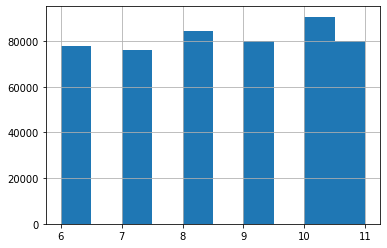

In [11]:
df['Crash_Month'].hist()

# Simple categorical variable (2 unique values)

In [13]:
cate_var=df.dtypes[df.dtypes=='object']
cate_vars=cate_var.index[1:]
cate_vars

Index(['Crash_AM/PM', 'Day_of_Week', 'Prsn_Type_ID', 'Prsn_Occpnt_Pos_ID',
       'Prsn_Ethnicity_ID', 'Prsn_Gndr_ID', 'Prsn_Ejct_ID', 'Prsn_Airbag_ID',
       'Prsn_Helmet_ID', 'Rpt_Rdwy_Sys_ID', 'Rpt_Road_Part_ID', 'Toll_Road_Fl',
       'Road_Constr_Zone_Fl', 'Road_Constr_Zone_Wrkr_Fl', 'At_Intrsct_Fl',
       'Wthr_Cond_ID', 'Light_Cond_ID', 'Road_Algn_ID', 'Surf_Cond_ID',
       'Traffic_Cntl_ID', 'Unit_Desc_ID'],
      dtype='object')

In [16]:
for feat in cate_vars:
    if len(df[feat].unique())==2:
        print(feat)
        df[feat]=np.where(df[feat]==df[feat].unique()[0],0,1)
df.head()

Crash_AM/PM
Toll_Road_Fl
Road_Constr_Zone_Fl
Road_Constr_Zone_Wrkr_Fl
At_Intrsct_Fl


,Injury Severity,Crash_Month,Crash_Day,Crash_Minute,Crash_AM/PM,Crash_Hour,Day_of_Week,Unit_Nbr,Prsn_Type_ID,Prsn_Occpnt_Pos_ID,...,Road_Constr_Zone_Wrkr_Fl,At_Intrsct_Fl,Wthr_Cond_ID,Light_Cond_ID,Road_Algn_ID,Surf_Cond_ID,Traffic_Cntl_ID,Latitude,Longitude,Unit_Desc_ID
0,INCAPACITATING INJURY,7,20,37,0,3,SAT,3,DRIVER,FRONT LEFT,...,0,0,CLEAR,"DARK, NOT LIGHTED","CURVE, GRADE",DRY,NO PASSING ZONE,28.151587,-99.325306,MOTOR VEHICLE
1,KILLED,7,27,45,0,11,SAT,3,DRIVER,FRONT LEFT,...,0,0,CLEAR,DAYLIGHT,"STRAIGHT, LEVEL",DRY,MARKED LANES,31.882988,-94.431731,MOTOR VEHICLE
2,KILLED,8,10,5,1,5,SAT,2,DRIVER,FRONT LEFT,...,0,0,CLEAR,DAYLIGHT,"STRAIGHT, LEVEL",DRY,MARKED LANES,30.162929,-95.231455,MOTOR VEHICLE
3,KILLED,7,21,17,1,6,SUN,2,DRIVER,FRONT LEFT,...,0,0,CLEAR,DAYLIGHT,"STRAIGHT, LEVEL",DRY,CENTER STRIPE/DIVIDER,33.044076,-96.015429,MOTOR VEHICLE
4,KILLED,8,27,26,0,7,TUE,2,DRIVER,FRONT LEFT,...,0,0,RAIN,DAYLIGHT,"STRAIGHT, GRADE",WET,CENTER STRIPE/DIVIDER,33.718658,-98.479331,MOTOR VEHICLE


# Other categorical variables

In [17]:
df_final=df.copy()

In [18]:
for feat in cate_vars:
    if len(df_final[feat].unique())>2:
        print(feat)
        dummies=pd.get_dummies(df[feat],prefix=feat).iloc[:,1:]
        #print(dummies)
        df_final.drop(columns=[feat],inplace=True)
        df_final=df_final.join(dummies)
df_final

Day_of_Week
Prsn_Type_ID
Prsn_Occpnt_Pos_ID
Prsn_Ethnicity_ID
Prsn_Gndr_ID
Prsn_Ejct_ID
Prsn_Airbag_ID
Prsn_Helmet_ID
Rpt_Rdwy_Sys_ID
Rpt_Road_Part_ID
Wthr_Cond_ID
Light_Cond_ID
Road_Algn_ID
Surf_Cond_ID
Traffic_Cntl_ID
Unit_Desc_ID


,Injury Severity,Crash_Month,Crash_Day,Crash_Minute,Crash_AM/PM,Crash_Hour,Unit_Nbr,Prsn_Age,Toll_Road_Fl,Crash_Speed_Limit,...,Traffic_Cntl_ID_STOP SIGN,Traffic_Cntl_ID_WARNING SIGN,Traffic_Cntl_ID_YIELD SIGN,Unit_Desc_ID_MOTORIZED CONVEYANCE,Unit_Desc_ID_NON-CONTACT,Unit_Desc_ID_OTHER (EXPLAIN IN NARRATIVE),Unit_Desc_ID_PEDALCYCLIST,Unit_Desc_ID_PEDESTRIAN,Unit_Desc_ID_TOWED/PUSHED/TRAILER,Unit_Desc_ID_TRAIN
0,INCAPACITATING INJURY,7,20,37,0,3,3,26,0,55,...,0,0,0,0,0,0,0,0,0,0
1,KILLED,7,27,45,0,11,3,61,0,75,...,0,0,0,0,0,0,0,0,0,0
2,KILLED,8,10,5,1,5,2,55,0,55,...,0,0,0,0,0,0,0,0,0,0
3,KILLED,7,21,17,1,6,2,84,0,65,...,0,0,0,0,0,0,0,0,0,0
4,KILLED,8,27,26,0,7,2,78,0,75,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488844,NOT INJURED,11,29,13,0,11,1,68,0,70,...,0,0,0,0,0,0,0,0,0,0
488845,NOT INJURED,11,25,6,0,11,1,44,0,55,...,1,0,0,0,0,0,0,0,0,0
488846,POSSIBLE INJURY,11,25,6,0,11,2,57,0,55,...,1,0,0,0,0,0,0,0,0,0
488847,NOT INJURED,9,3,15,1,4,1,16,0,40,...,1,0,0,0,0,0,0,0,0,0


In [19]:
df_final.to_csv('final data.csv',index=False)